## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 8*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


8. Para cada uno de los resultados (a)-(d), determinar cuál debe ser el elemento estructurante y la operación morfológica que se debe aplicar a la imagen inicial, para obtener cada resultado.

-------

#### *Importar librerías*

Como primer paso, se importan las librerías necesarias para el desarrollo del ejercicio.

In [111]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage import morphology
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import invert
from skimage.filters import threshold_otsu, gaussian
from skimage.morphology import binary_opening, binary_closing, binary_dilation, binary_erosion
from skimage import io, color, filters, feature, morphology, exposure, util

from skimage.measure import label, regionprops
from skimage.color import label2rgb
from scipy import ndimage

---------

#### *Imagen Original -> Imagen A*

Luego, se carga la imagen original y se binariza. 

In [112]:
# Importar imagen en escala de grises
original = cv2.imread('img/8.png', cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen con Otsu
_, original = cv2.threshold(original, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

Posteriormente, se puede iniciar con la operación morfológica que se debe aplicar a la imagen inicial para obtener el resultado A.

A continuación, se muestra la imagen original y el resultado esperado. 

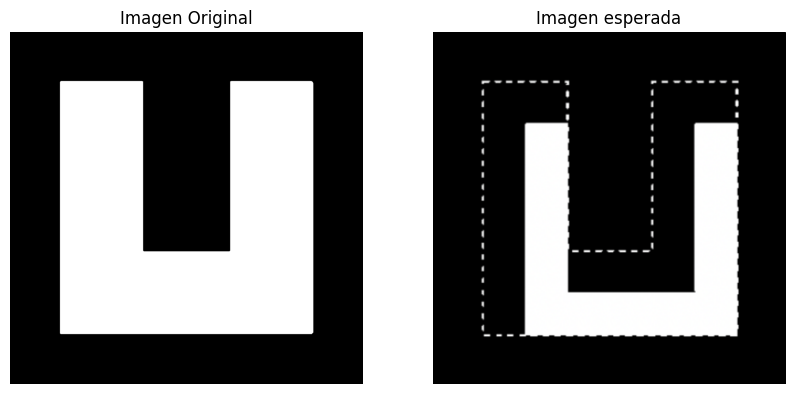

In [113]:
# Mostrar las imagenes de referencia

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

conteo = cv2.imread('img/8a.png')
plt.subplot(1, 2, 2)
plt.imshow(conteo, cmap='gray')
plt.title('Imagen esperada')
plt.axis('off')

plt.show()

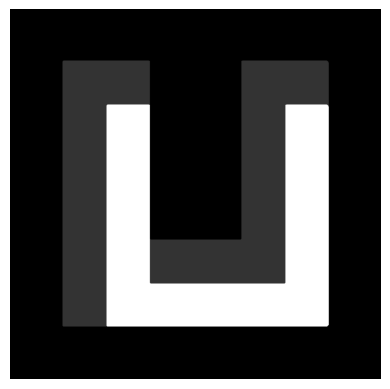

In [114]:
# Elemento estructurante: Matriz de 3x3 con 2x2 de unos en la esquina superior izquierda
kernel1 = np.array([
    [1, 1, 0],
    [1, 1, 0],
    [0, 0, 0]
]).astype(np.uint8)

# Operación Morfológica: Erosión
a = cv2.erode(original, kernel1, iterations=140)

# Mostrar la imagen dilatada
transparencia = 0.8
imagen_transparente = cv2.addWeighted(original, 1 - transparencia, a, transparencia, 0)
plt.imshow(cv2.cvtColor(imagen_transparente, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Para alcanzar la Imagen A se utilizó:

- **Elemento Estructurante**: Matriz de 3x3 con 2x2 de 1s en la esquina superior izquierda
- **Operación Morfológica**: Erosión

---------

#### *Imagen Original -> Imagen B*

A continuación, se muestra la imagen original y el resultado esperado. 

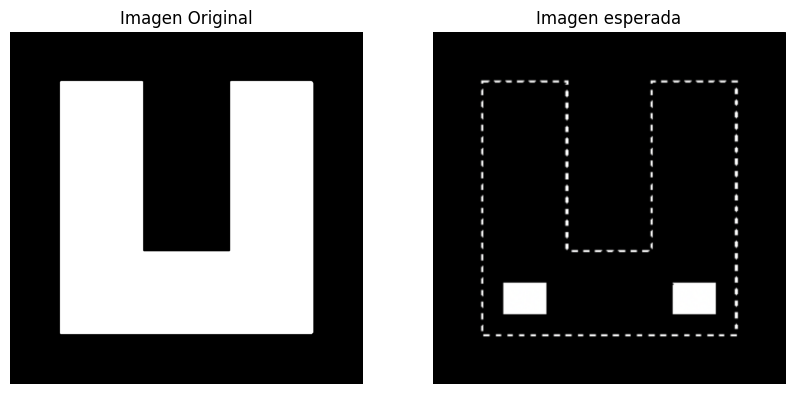

In [115]:
# Mostrar las imagenes de referencia

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

conteo = cv2.imread('img/8b.png')
plt.subplot(1, 2, 2)
plt.imshow(conteo, cmap='gray')
plt.title('Imagen esperada')
plt.axis('off')

plt.show()

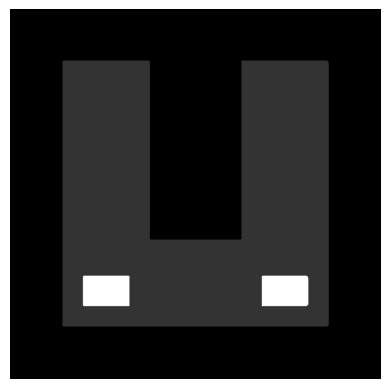

In [129]:
rect_zeros = np.array([np.zeros(131)] * 620)
rect_ones = cv2.getStructuringElement(cv2.MORPH_RECT, (131, 751))

# Elemento estructurante: Rectangulo de 131x751, con 131x620 de ceros en la parte superior
kernel1 = np.concatenate((rect_ones, rect_zeros), axis=0).astype(np.uint8)

# Operación Morfológica: Erosión
b = cv2.erode(original, kernel1, iterations=1)

# Mostrar la imagen final
transparencia = 0.8
imagen_transparente = cv2.addWeighted(original, 1 - transparencia, b, transparencia, 0)
plt.imshow(cv2.cvtColor(imagen_transparente, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

---------

#### *Imagen Original -> Imagen C*

A continuación, se muestra la imagen original y el resultado esperado. 

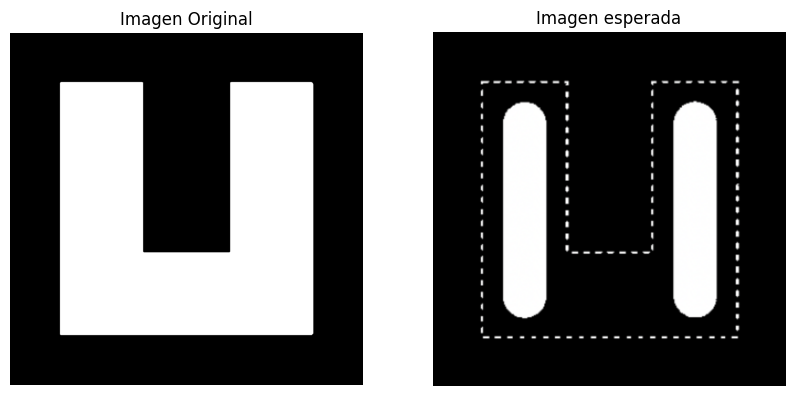

In [117]:
# Mostrar las imagenes de referencia

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

conteo = cv2.imread('img/8c.png')
plt.subplot(1, 2, 2)
plt.imshow(conteo, cmap='gray')
plt.title('Imagen esperada')
plt.axis('off')

plt.show()

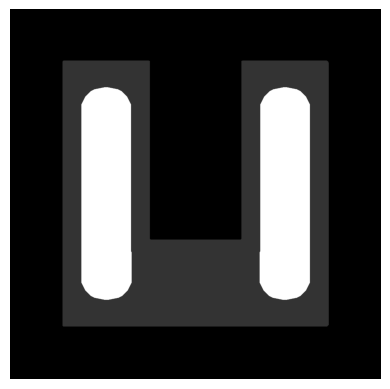

In [118]:
circulo = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
k_arriba = circulo[:13, :]
k_abajo = circulo[12:, :]

rectangulo = np.array([np.ones(25)] * 9)

# Elemento estructurante: Disco alargado       (Similar a la forma esperada)
kernel1 = np.concatenate((k_arriba, rectangulo, k_abajo), axis=0).astype(np.uint8)

# Operación Morfológica: Opening (Erosión seguida de Dilatación)
c = cv2.erode(original, kernel1, iterations=11)
c = cv2.dilate(c, kernel1, iterations=6)

# Mostrar la imagen final
transparencia = 0.8
imagen_transparente = cv2.addWeighted(original, 1 - transparencia, c, transparencia, 0)
plt.imshow(cv2.cvtColor(imagen_transparente, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Para alcanzar la Imagen C se utilizó:

- **Elemento Estructurante:** Circulo/Disco alargado
- **Operación Morfológica:** Opening (Erosión seguida de Dilatación)

*Cabe destacar que inicialmente se pensó que con erosión sería suficiente. Sin embargo, al experimentar se pudo observar que las líneas verticales no lograban obtener los extremos redondeados.*

---------

#### *Imagen Original -> Imagen D*

A continuación, se muestra la imagen original y el resultado esperado. 

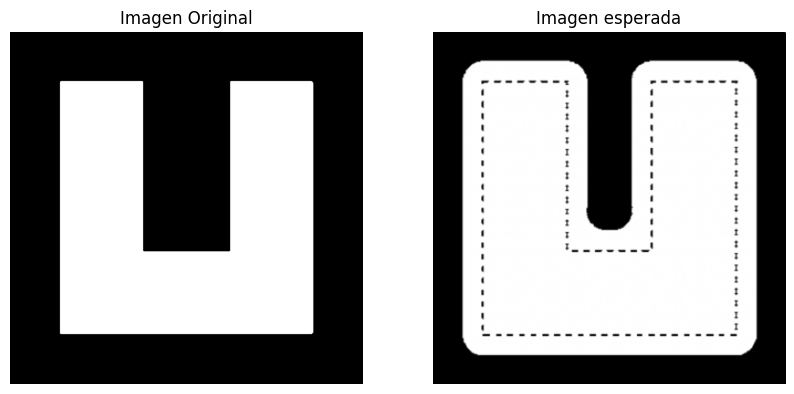

In [119]:
# Mostrar las imagenes de referencia

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

conteo = cv2.imread('img/8d.png')
plt.subplot(1, 2, 2)
plt.imshow(conteo, cmap='gray')
plt.title('Imagen esperada')
plt.axis('off')

plt.show()

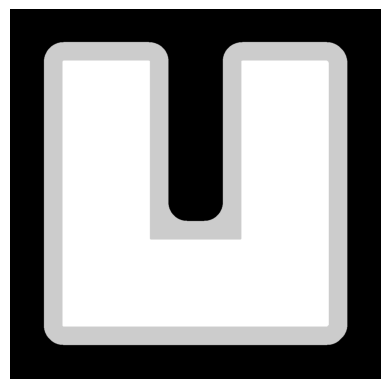

In [121]:
# ELemento estructurante: Elipse de 120x120
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (119, 119))

# Operación Morfológica: Closing (Dilatación seguida de Erosión)
d = cv2.dilate(original, kernel1, iterations=2)
d = cv2.erode(d, kernel1, iterations=1)

# Mostrar la imagen final
transparencia = 0.8
imagen_transparente = cv2.addWeighted(original, 1 - transparencia, d, transparencia, 0)
plt.imshow(cv2.cvtColor(imagen_transparente, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Para alcanzar la Imagen D se utilizó:

- **Elemento Estructurante:** Elipse/Disco
- **Operación Morfológica:** Closing (Dilatación seguida de Erosión)

*En este caso, nuevamente se pensó que con dilatación se lograría obtener el resultado esperado. Sin embargo, al hacer la prueba, la parte interior de la U aún tenía ángulos de 90°.*